In [2]:
import pickle
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dir_in_Lx = '../out/20.0518 Lx/L100only_reg_rf_boruta_all/'

y_compr_tr = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_tr.pkl'), 'rb'))
y_compr_te = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_te.pkl'), 'rb'))

In [4]:
np.random.seed(seed=25)
def getDummyInfer(y):    
    return np.random.uniform(-4.4923381539,3.9745784786800002, size=y.shape[0])

In [5]:
y_pred = y_compr_tr['actual'].apply(getDummyInfer, axis=0)

In [6]:
y_pred.head(3)

,IFNA6,CES4A,ABI1,LCTL,MICALL2,LCE3D,SURF2,ICA1L,NDUFAF1,ZNF639,...,PCDH7,TRAPPC3,MRPL36,RPL15,MICAL2,HTR1A,PITPNB,BCL2L1,HOXA5,FIS1
0,3.948721,-3.554556,2.051745,-3.382329,3.531846,-3.529821,1.462905,3.408172,-1.806702,2.173657,...,3.673699,0.323418,-4.305669,0.198151,3.911570,0.845171,3.914127,0.609346,-2.643667,3.742767
1,-1.483495,-2.432728,-2.830477,-4.488579,0.011416,-1.091852,2.925236,-3.512653,2.910884,-2.201990,...,1.619831,1.084328,-4.045858,2.178723,-0.776854,2.955835,-3.921646,1.807347,-0.940113,-3.378607
2,2.093684,-2.910513,-3.102304,-0.817920,1.832333,-3.571752,-4.420412,-2.637025,-3.107504,-2.317013,...,3.010774,0.181341,1.394958,-0.597361,3.299598,1.803922,0.386799,1.116604,3.047892,-1.747671


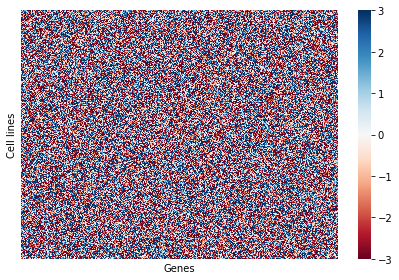

In [7]:
plt.figure()
ax = sns.heatmap(y_pred, yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

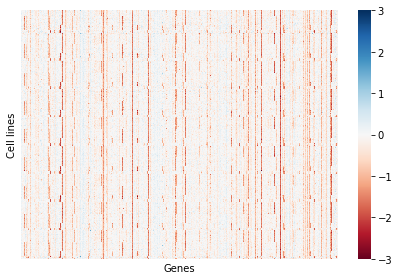

In [8]:
plt.figure()
ax = sns.heatmap(y_compr_tr['actual'], yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

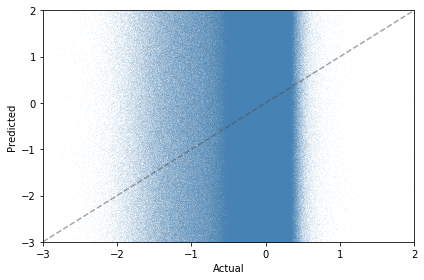

In [9]:
plt.figure()
plt.plot([-3,2], [-3,2], ls="--", c=".3", alpha=0.5)
ax = sns.scatterplot(y_compr_tr['actual'].values.flatten(), y_pred.values.flatten(),
                     s = 1, alpha=0.05, linewidth=0, color='steelblue')
ax.set(xlabel='Actual', ylabel='Predicted', xlim=[-3,2], ylim=[-3,2])
plt.tight_layout()

In [10]:
from scipy.stats import pearsonr
pearsonr(y_compr_tr['actual'].values.flatten(), y_pred.values.flatten())

(0.00026133745292848, 0.43572234306101953)

Randomized regressor by simply predicting median has an overall pearson correlation of 0.0. With a random forest (and boruta etc), the pearson correlation is 0.946.